In [1]:
# https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y= True)
print ('X.shape= ', X.shape)
print ('y.shape= ', y.shape)
print(X[:3],'\n', y[:3])


X.shape=  (569, 30)
y.shape=  (569,)
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]] 
 [0 0 0]


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import numpy as np

np.random.seed(2025)
# YOUR_CODE.  Preproces data, train classifier and evaluate the perfromance on train and test sets 
# START_CODE 
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)
clf= MLPClassifier(hidden_layer_sizes=(100,3), activation='relu', solver='lbfgs', max_iter=500)
clf.fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf.score(X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score(X_test, y_test)))
# END_CODE 
    

train accuracy= 100.000%
test accuracy= 99.301%


In [3]:
import h5py # common package to interact with a dataset that is stored on an H5 file.
import os
cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'data') 

# signs data set (fingers)
def load_dataset():
    fn =  os.path.join(path , 'train_signs.h5')
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn =  os.path.join(path , 'test_signs.h5')
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return X_train, y_train, X_test, y_test, classes
X_train, y_train, X_test, y_test, classes = load_dataset()
y_train = y_train.ravel()
y_test = y_test.ravel()
print ('X_train.shape=', X_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_train.shape=', y_train.shape)
print ('y_test.shape=', y_test.shape)

X_train.shape= (1080, 64, 64, 3)
X_test.shape= (120, 64, 64, 3)
y_train.shape= (1080,)
y_test.shape= (120,)


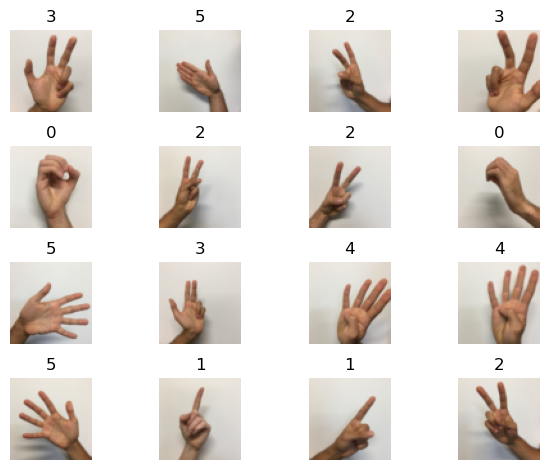

In [4]:
import matplotlib.pyplot as plt
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None: 
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows): 
        for j in range (n_cols):
            index = n_rows*i+j           
            ax = plt.subplot(n_rows,n_cols,index+1) 
            plt.imshow(X[indices[index]])
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

    plt.tight_layout(h_pad=1)
plt.figure()

display_samples_in_grid(X_train, n_rows=4, y= y_train)

In [5]:

# YOUR_CODE.  Preproces data
# START_CODE 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_scaled = scaler.transform(X_test.reshape(X_test.shape[0], -1))
# END_CODE     

print ("number of training examples = " + str(X_train_scaled.shape[1]))
print ("number of test examples = " + str(X_test_scaled.shape[1]))
print ("X_train_scaled shape: " + str(X_train_scaled.shape))

print ("X_test_scaled shape: " + str(X_test_scaled.shape))

number of training examples = 12288
number of test examples = 12288
X_train_scaled shape: (1080, 12288)
X_test_scaled shape: (120, 12288)


In [6]:
# YOUR_CODE.  Train classifier and evaluate the perfromance on train and test sets 
# START_CODE 

clf = MLPClassifier(hidden_layer_sizes=(100), max_iter=500)
clf.fit(X_train_scaled, y_train)
print("train accuracy= {:.3%}".format(clf.score(X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score(X_test_scaled, y_test)))
# END_CODE     

train accuracy= 100.000%
test accuracy= 90.833%


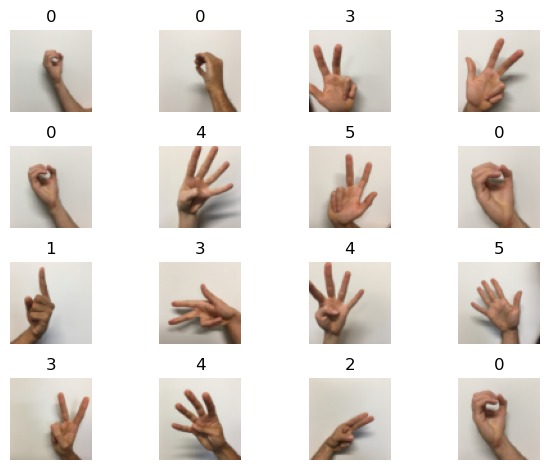

In [7]:
plt.figure()
predicted = clf.predict(X_test_scaled)
display_samples_in_grid(X_test, n_rows=4, y=predicted)


In [8]:
from sklearn.svm import SVC
clf = SVC(C=10, kernel='rbf', gamma=0.0001).fit(X_train_scaled, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))

train accuracy= 100.000%
test accuracy= 95.000%
